In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
pd.set_option('max_rows', 200)
pd.set_option('max_columns', 200)
sns.set_style('ticks')

In [2]:
def get_scaled_data(data, month=None):
    if month:
        data = data.loc[data['month'] == month]
    scaler = StandardScaler()
    scaler.fit(data)
    scaled_data = scaler.transform(data)
    df = pd.DataFrame(scaled_data, columns=data.columns)
    return df

In [3]:
def get_corr_heatmap(df, month=True):
    if month:
        df = df.drop(['month', 'day'], axis=1)
    fig= plt.figure(figsize=(10,10))
    ax = sns.heatmap(np.round(df.corr(),2),  cmap='terrain',vmin=-1, vmax=1, annot=True)
    plt.show()

In [4]:
def plot_param(df, params):
    fig = plt.figure(figsize = (13,5))
    ax = fig.add_subplot(111)
    i=10
    for param in params:
        ax.plot('index', param, marker='o', markersize=2, data=df.reset_index(), label=param, zorder=i)
        #print(param,i)
        i-=1
    plt.legend()
    plt.grid()
    plt.show()

In [5]:
def plot_param_bar(df, params, base='subscriber', scale=True, filename="file", labels=[], title=""):
    salt = 0
    if scale:
        val = min(df[base])
        for param in df.columns:
            #print(param)
            df[param] = df[param] - val + salt
    fig = plt.figure(figsize = (13,5))
    ax = fig.add_subplot(111)
    i=10
    max_weekend = max(df['isWeekend'])
    weekday = df.loc[df['isWeekend'] != max_weekend]
    weekend = df.loc[df['isWeekend'] == max_weekend]
    #display(weekday)
    #display(weekend)
    ax.bar('index', base, data=weekend.reset_index(), label=base+'(Weekend)', color='coral')
    ax.bar('index', base, data=weekday.reset_index(), label=base+'(Weekday)', color='lightblue')
    counter=0
    for param in params:
        if param == 'TMAX':
            ax.plot('index', param, marker='o', markersize=2, data=df.reset_index(), zorder=i, color='green', label=labels[counter])
        else:
            ax.plot('index', param, marker='o', markersize=2, data=df.reset_index(), zorder=i, label=labels[counter])
        #print(param,i)
        i-=1
        counter+=1
    ax.set_xticks(list(range(0,31)))
    ax.set_xticklabels(list(range(1,32)))
    ax.set_xlabel("Day")
    ax.set_ylabel("Transformed Value")
    #display(df.head())
    plt.legend()
    plt.grid()
    plt.title(title)
    if save:
        plt.savefig(path+filename+".jpg")
    plt.show()

In [6]:
def get_cust(df):
    salt = 0
    for param in df.columns:
        df[param] = df[param] - min(df['customer']) + salt
    cust = df.loc[df['isWeekend'] == max(df['isWeekend'])].reset_index(drop=True)
    return cust

In [7]:
def get_sub(df):
    salt = 0
    for param in df.columns:
        df[param] = df[param] - min(df['subscriber']) + salt
    sub = df.loc[df['isWeekend'] == min(df['isWeekend'])].reset_index(drop=True)
    return sub

In [8]:
path = "graphs/"
save = False

In [9]:
data = pd.read_csv("data/ride_weather.csv")

In [10]:
data.drop(['year'], axis=1, inplace=True)

In [11]:
data = data[['TAVG', 'TMAX', 'TMIN', 'SNOW', 'SNWD', 'PRCP', 'AWND', 'isWeekend', 'isHoliday', 'day', 'month', 'weekday', 'customer', 'subscriber']]

### March

#### For the month of March, we notice a higher amount of correlation between SnowWidth (SNWD) and MaxTemprature (TMAX) for subscribers while a higher amount of correlation between TMAX and Customer.

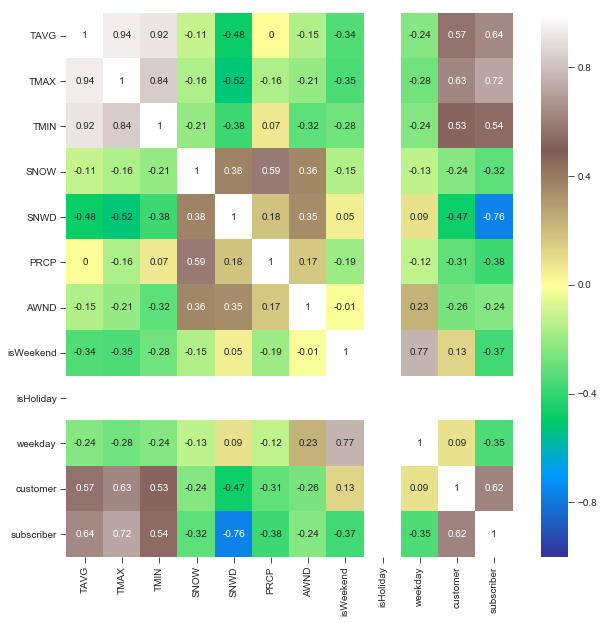

In [12]:
month = 3
march = get_scaled_data(data, month=month)
get_corr_heatmap(march)

#### Transforming parameters that are negatively correlated so as to easily see their impact on the graph.

In [13]:
march['t_SNWD'] = march['SNWD'] * (-1)

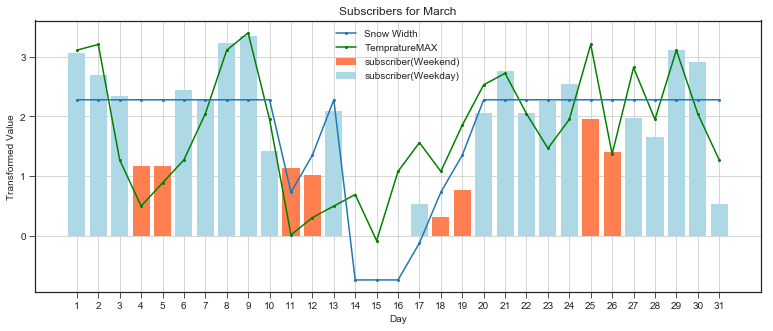

In [14]:
plot_param_bar(march.reset_index(drop=True), ['t_SNWD', 'TMAX'], scale=True, filename="weather_march_sub", labels=['Snow Width', 'TempratureMAX'], title="Subscribers for March")

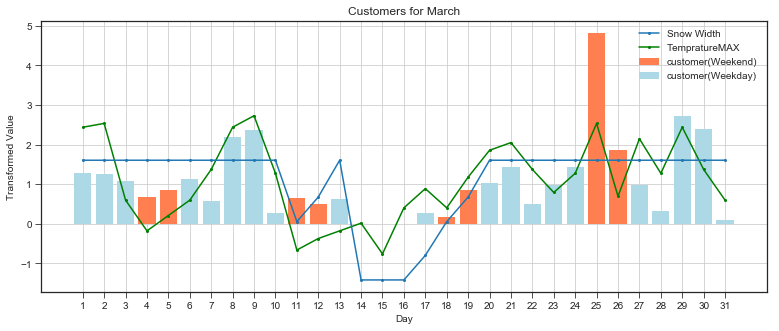

In [15]:
plot_param_bar(march, ['t_SNWD', 'TMAX'], base='customer', labels=['Snow Width', 'TempratureMAX'], filename="weather_march_cust", title="Customers for March")

### July

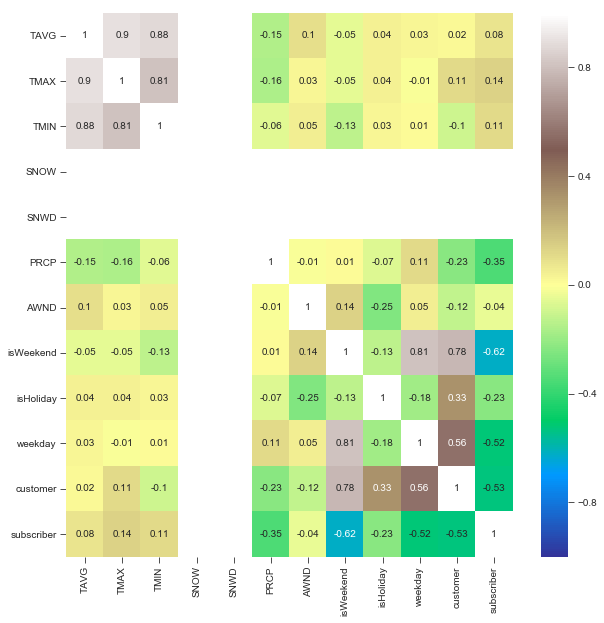

In [16]:
month = 7
july = get_scaled_data(data, month=month)
get_corr_heatmap(july)

In [17]:
july['t_isWeekend'] = july['isWeekend'] * (-1)
july['t_PRCP'] = july['PRCP'] * (-1)
july['t_AWND'] = july['AWND'] * (-1)

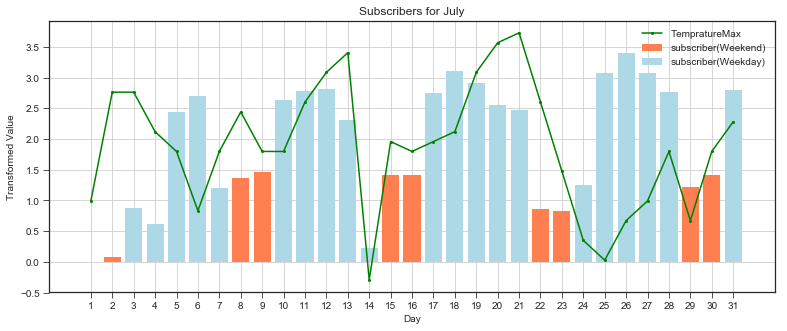

In [18]:
plot_param_bar(july.reset_index(drop=True), params=['TMAX'], labels=['TempratureMax'], filename="weather_july_sub", title="Subscribers for July")

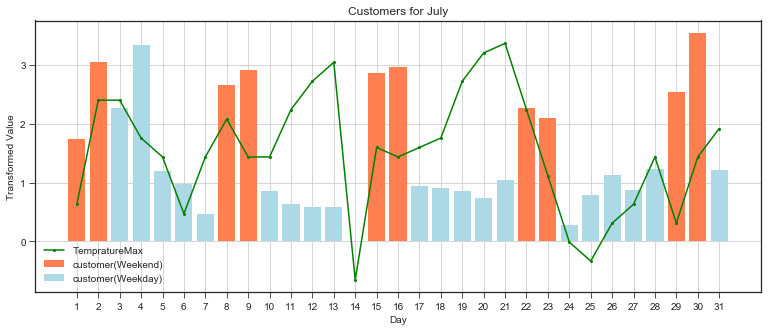

In [19]:
plot_param_bar(july.reset_index(drop=True), params=['TMAX'], base="customer", labels=['TempratureMax'], filename="weather_july_cust", title="Customers for July")

### October

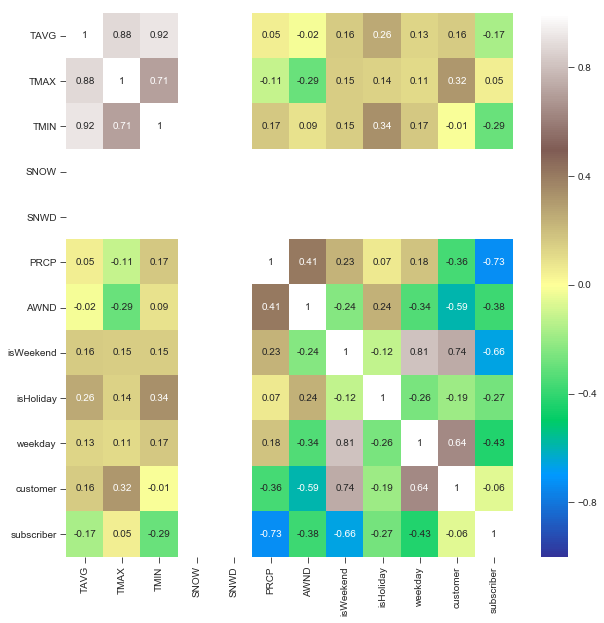

In [20]:
month = 10
october = get_scaled_data(data, month=month)
get_corr_heatmap(october)

In [21]:
october['t_PRCP'] = october['PRCP'] * (-1)
october['t_isWeekend'] = october['isWeekend'] * (-1)
october['t_AWND'] = october['AWND'] * (-1)

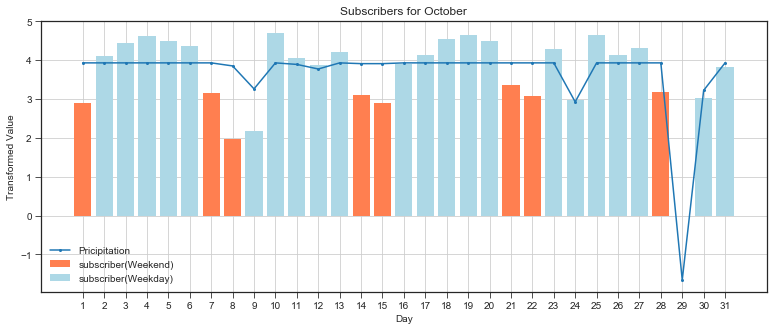

In [22]:
plot_param_bar(october.reset_index(drop=True), ['t_PRCP'], labels=['Pricipitation'], filename="weather_oct_sub", title="Subscribers for October")

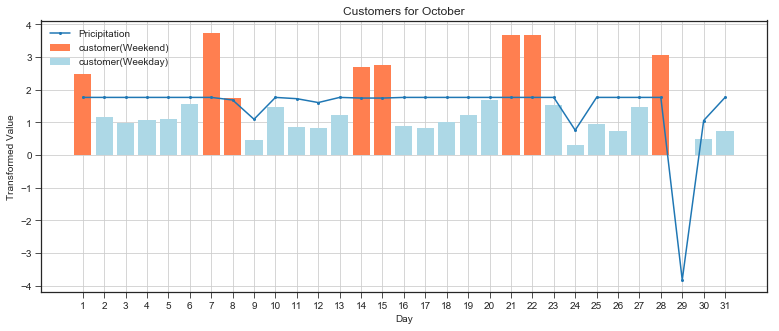

In [23]:
plot_param_bar(october.reset_index(drop=True), ['t_PRCP'], base="customer",labels=['Pricipitation'], filename="weather_oct_cust", title="Customers for October")

### December

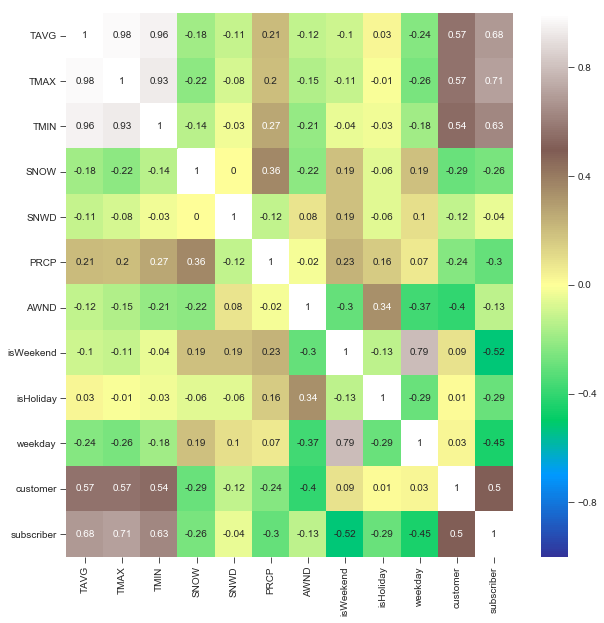

In [24]:
month = 12
dec = get_scaled_data(data, month=month)
#display(df)
get_corr_heatmap(dec)

In [25]:
dec['PRCP'] = dec['PRCP'] * (-1)
dec['t_SNOW'] = dec['SNOW'] * (-1)

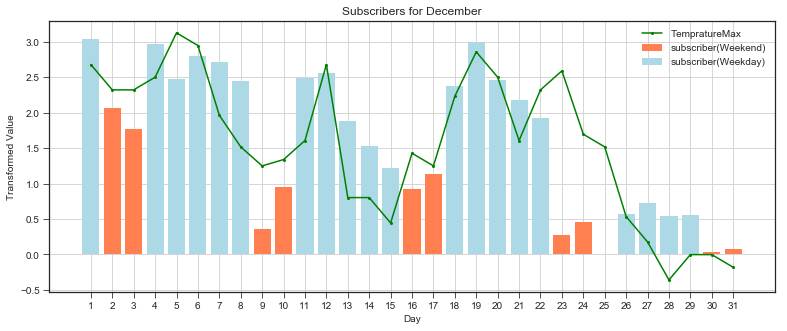

In [26]:
plot_param_bar(dec.reset_index(drop=True), ['TMAX'], labels=['TempratureMax'], filename="weather_dec_sub", title="Subscribers for December")

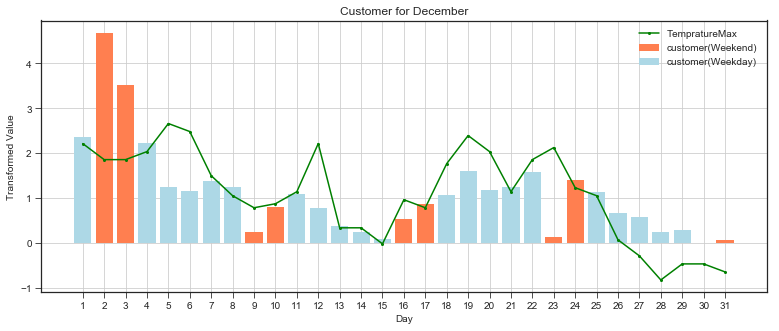

In [27]:
plot_param_bar(dec.reset_index(drop=True), ['TMAX'], base='customer', labels=['TempratureMax'], filename="weather_dec_cust", title="Customer for December")

### Subscriber

#### Data for subscribers for all four months but for only weekdays.

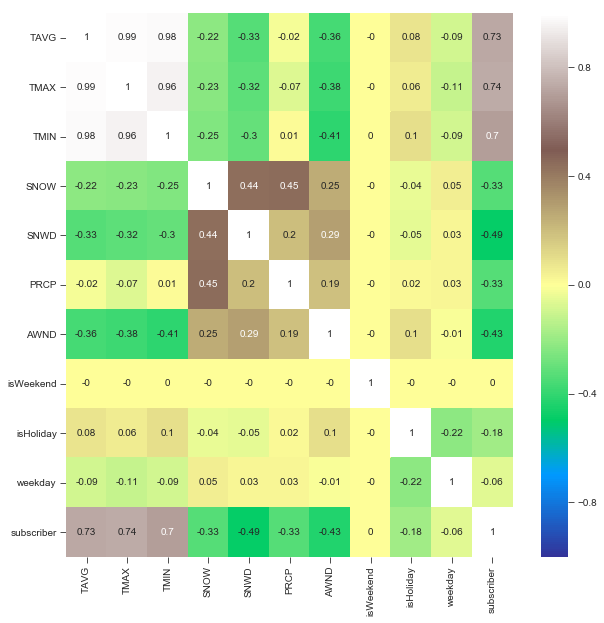

In [38]:
sub = get_sub(get_scaled_data(data).reset_index(drop=True)).drop(['customer'], axis=1)
get_corr_heatmap(sub)

In [29]:
temp_sub = sub
temp_sub['t_SNWD'] = temp_sub['SNWD'] * (-1)
temp_sub['t_PRCP'] = temp_sub['PRCP'] * (-1)
tmax = max(temp_sub['t_SNWD'])
temp_sub['t_SNWD'] = temp_sub['t_SNWD'] + (0 - tmax)
prcpmax = max(temp_sub['t_PRCP'])
temp_sub['t_PRCP'] = temp_sub['t_PRCP'] + (0- prcpmax)

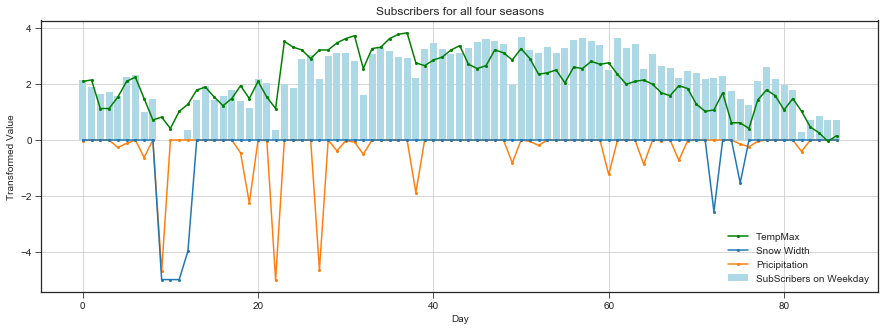

In [30]:
base='subscriber'
scale=True
filename="sub_eve"
labels=['TempMax', 'Snow Width', 'Pricipitation']
params=['TMAX', 't_SNWD', 't_PRCP']
salt = 0
if scale:
    val = min(temp_sub[base])
    for param in temp_sub.columns:
        #print(param)
        temp_sub[param] = temp_sub[param] - val + salt
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(111)
i=10
max_weekend = max(sub['isWeekend'])
ax.bar('index', base, data=temp_sub.reset_index(), label='SubScribers on Weekday', color='lightblue')
counter=0
for param in params:
    if param == 'TMAX':
        ax.plot('index', param, marker='o', markersize=2, data=temp_sub.reset_index(), zorder=i, color='green', label=labels[counter])
    else:
        ax.plot('index', param, marker='o', markersize=2, data=temp_sub.reset_index(), zorder=i, label=labels[counter])
    #print(param,i)
    i-=1
    counter+=1
ax.set_xlabel("Day")
ax.set_ylabel("Transformed Value")
plt.legend()
plt.grid()
plt.title("Subscribers for all four seasons")
if save:
    plt.savefig(path+filename+".jpg")
plt.show()

### Customer

#### Analysizng the data for all four moths but only on weekends for customer.

#### A high correlation with TMAX is noticed. Which leads to assume that customers are highly affected by weather.

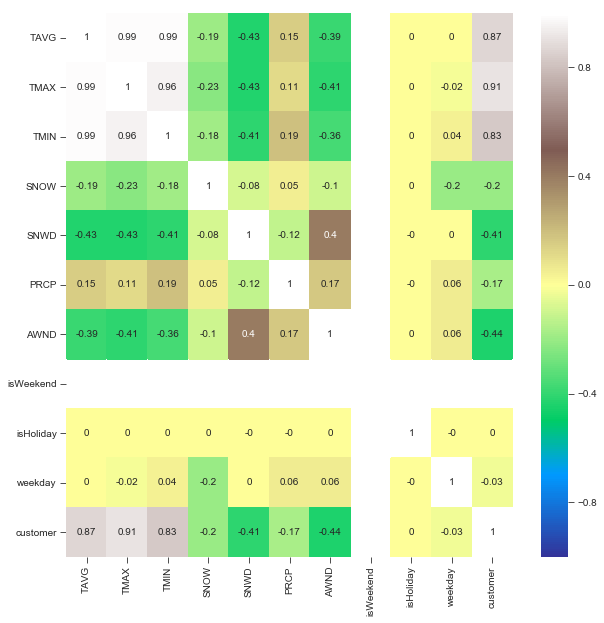

In [37]:
cust = get_cust(get_scaled_data(data).reset_index(drop=True)).drop(['subscriber'], axis=1)
get_corr_heatmap(cust)

In [32]:
temp_cust = cust

In [33]:
temp_cust = cust
temp_cust['t_SNWD'] = temp_cust['SNWD'] * (-1)
temp_cust['t_PRCP'] = temp_cust['PRCP'] * (-1)
tmax = max(temp_cust['t_SNWD'])
temp_cust['t_SNWD'] = temp_cust['t_SNWD'] + (0 - tmax)
prcpmax = max(temp_cust['t_PRCP'])
temp_cust['t_PRCP'] = temp_cust['t_PRCP'] + (0- prcpmax)

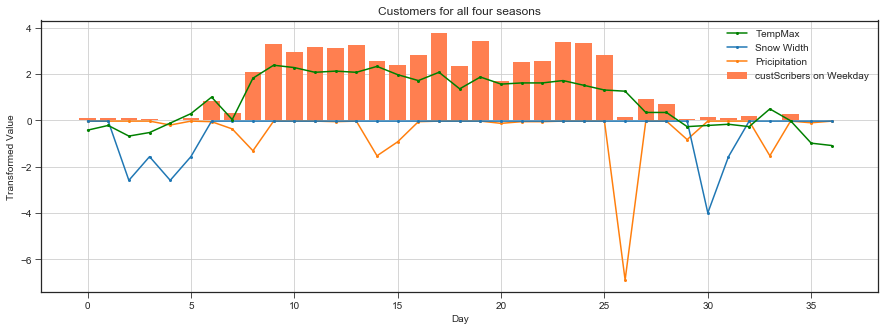

In [35]:
base='customer'
scale=True
filename="cust_eve"
labels=['TempMax', 'Snow Width', 'Pricipitation']
params=['TMAX', 't_SNWD', 't_PRCP']
salt = 0
if scale:
    val = min(temp_cust[base])
    for param in temp_cust.columns:
        #print(param)
        temp_cust[param] = temp_cust[param] - val + salt
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(111)
i=10
max_weekend = max(cust['isWeekend'])
ax.bar('index', base, data=temp_cust.reset_index(), label='custScribers on Weekday', color='coral')
counter=0
for param in params:
    if param == 'TMAX':
        ax.plot('index', param, marker='o', markersize=2, data=temp_cust.reset_index(), zorder=i, color='green', label=labels[counter])
    else:
        ax.plot('index', param, marker='o', markersize=2, data=temp_cust.reset_index(), zorder=i, label=labels[counter])
    #print(param,i)
    i-=1
    counter+=1
ax.set_xlabel("Day")
ax.set_ylabel("Transformed Value")
plt.legend()
plt.grid()
plt.title("Customers for all four seasons")
if save:
    plt.savefig(path+filename+".jpg")
plt.show()